In [1]:
# Load no TTT submissions
import json
import os

# Submission file from model W/O TTT
path_to_submission_file = os.path.join("..", "01_output_evaluation_Llama-rearc_without_ttt", "submission.json")
with open(path_to_submission_file, 'r') as file:
    data_submission = json.load(file)

print(f"submission data is of type {type(data_submission)} with length {len(data_submission)}")

first_key = list(data_submission.keys())[0]
print(f"first key is {first_key} and returns type {type(data_submission[first_key])}")

submission data is of type <class 'dict'> with length 400
first key is 49d1d64f and returns type <class 'list'>


In [1]:
# Load TTT with gradient accumulation = 4 submissions
import json
import os

# Submission file from model W/O TTT
path_to_submission_file = os.path.join("..", "02_output_evaluation_Llama-rearc_with_ttt", "submission.json")
with open(path_to_submission_file, 'r') as file:
    data_submission = json.load(file)

print(f"submission data is of type {type(data_submission)} with length {len(data_submission)}")

first_key = list(data_submission.keys())[0]
print(f"first key is {first_key} and returns type {type(data_submission[first_key])}")

submission data is of type <class 'dict'> with length 100
first key is f76d97a5 and returns type <class 'list'>


In [2]:
# Submission file from model WITH TTT
path_to_submission_file = os.path.join("..", "01_output_evaluation_Llama-rearc_with_ttt", "submission.json")
with open(path_to_submission_file, 'r') as file:
    data_submission_ttt = json.load(file)

print(f"submission data is of type {type(data_submission_ttt)} with length {len(data_submission_ttt)}")

first_key = list(data_submission_ttt.keys())[0]
print(f"first key is {first_key} and returns type {type(data_submission_ttt[first_key])}")

submission data is of type <class 'dict'> with length 100
first key is ea786f4a and returns type <class 'list'>


In [14]:
# Load training data (for visualizations)
path_to_data_train = os.path.join("..", "data", "arc-agi_training_challenges.json")

with open(path_to_data_train, 'r') as file:
    data_train = json.load(file)

In [15]:
# Load solutions
path_to_data_solutions = os.path.join("..", "data", "arc-agi_training_solutions.json")

with open(path_to_data_solutions, 'r') as file:
    data_train_solutions = json.load(file)

In [3]:
# Extract only the tasks that were also in the submission file with TTT
data_submission = {key: data_submission[key] for key in data_submission_ttt.keys()}

# Verify that the data_submission_filtered has the same keys as data_submission_ttt
assert data_submission.keys() == data_submission_ttt.keys()

In [16]:
def check_submission(submission, solutions):
    # Check the submission against the solutions
    results = dict()
    for task_id, task_submission in submission.items():
        # task_submission[0] is a dictionary {"attempt_1":[grid], "attempt_2":[grid]} 

        task_solution = solutions[task_id][0]

        if task_submission[0]["attempt_1"] == task_solution:
            results[task_id] = 1
        elif task_submission[0]["attempt_2"] == task_solution:
            results[task_id] = 1
        else:
            results[task_id] = 0    
    return results

def get_score(results):
    total_correct = sum(results.values())
    total = len(results.keys())
    return round(total_correct/total, 2)

res_data_submission = check_submission(data_submission, data_train_solutions)
res_data_submission_ttt = check_submission(data_submission_ttt, data_train_solutions)

print("Results:")
print(f"\tW/O TTT Score:\t{get_score(res_data_submission):.1%}")
print(f"\tW TTT Score:\t{get_score(res_data_submission_ttt):.1%}")

Results:
	W/O TTT Score:	89.0%
	W TTT Score:	90.0%


In [9]:
# Find the tasks that were solved by one model but not the other

# Extract all of the keys for which the value is 1
tasks_solved_data_submission = set([key for key, value in res_data_submission.items() if value == 1])
tasks_solved_data_submission_ttt = set([key for key, value in res_data_submission_ttt.items() if value == 1])

# A list of keys (tasks) that were solved by one model but not the other
solved_without_ttt_not_with = list(set(tasks_solved_data_submission).difference(tasks_solved_data_submission_ttt))
solved_with_ttt_not_without = list(set(tasks_solved_data_submission_ttt).difference(tasks_solved_data_submission))

print(f"Tasks solved by model W/O TTT but not WITH TTT: {solved_without_ttt_not_with}")
print(f"Tasks solved by model with TTT but not W/O TTT: {solved_with_ttt_not_without}")

Tasks solved by model W/O TTT but not WITH TTT: ['d22278a0']
Tasks solved by model with TTT but not W/O TTT: ['b230c067', 'db93a21d']


# Lots of second attempts have the wrong grid size!

In [8]:
# Compute how many first and second attempts have different grid-size than the solution

# (for model with TTT)

def incorrect_size(data, solutions, attempt_n=1):
    # data is a dictionary with keys as task ids and values as a list of dictionaries
    # each dictionary has keys "attempt_1" and "attempt_2" with values as the output grid
    incorrect_size = list()
    for task_id, task_data in data.items():
        task_solution = solutions[task_id][0]
        for attempt in task_data:
            if len(attempt[f"attempt_{attempt_n}"]) != len(task_solution) or len(attempt[f"attempt_{attempt_n}"][0]) != len(task_solution[0]):
                incorrect_size.append(task_id)
                break
    return incorrect_size

print("Model with TTT")
test = incorrect_size(data_submission_ttt, data_train_solutions, attempt_n=1)
print(f"Number of tasks where attempt 1 has different size than the solution: {len(test)}")
test = incorrect_size(data_submission_ttt, data_train_solutions, attempt_n=2)
print(f"Number of tasks where attempt 2 has different size than the solution: {len(test)}")


Model with TTT
Number of tasks where attempt 1 has different size than the solution: 5
Number of tasks where attempt 2 has different size than the solution: 29


In [9]:
# Compute how many first and second attempts have different grid-size than the solution

# (for model without TTT)

def incorrect_size(data, solutions, attempt_n=1):
    # data is a dictionary with keys as task ids and values as a list of dictionaries
    # each dictionary has keys "attempt_1" and "attempt_2" with values as the output grid
    incorrect_size = list()
    for task_id, task_data in data.items():
        task_solution = solutions[task_id][0]
        for attempt in task_data:
            if len(attempt[f"attempt_{attempt_n}"]) != len(task_solution) or len(attempt[f"attempt_{attempt_n}"][0]) != len(task_solution[0]):
                incorrect_size.append(task_id)
                break
    return incorrect_size

print("Model W/O TTT")
test = incorrect_size(data_submission, data_train_solutions, attempt_n=1)
print(f"Number of tasks where attempt 1 has different size than the solution: {len(test)}")
test = incorrect_size(data_submission, data_train_solutions, attempt_n=2)
print(f"Number of tasks where attempt 2 has different size than the solution: {len(test)}")


Model W/O TTT
Number of tasks where attempt 1 has different size than the solution: 9
Number of tasks where attempt 2 has different size than the solution: 36


W/O TTT


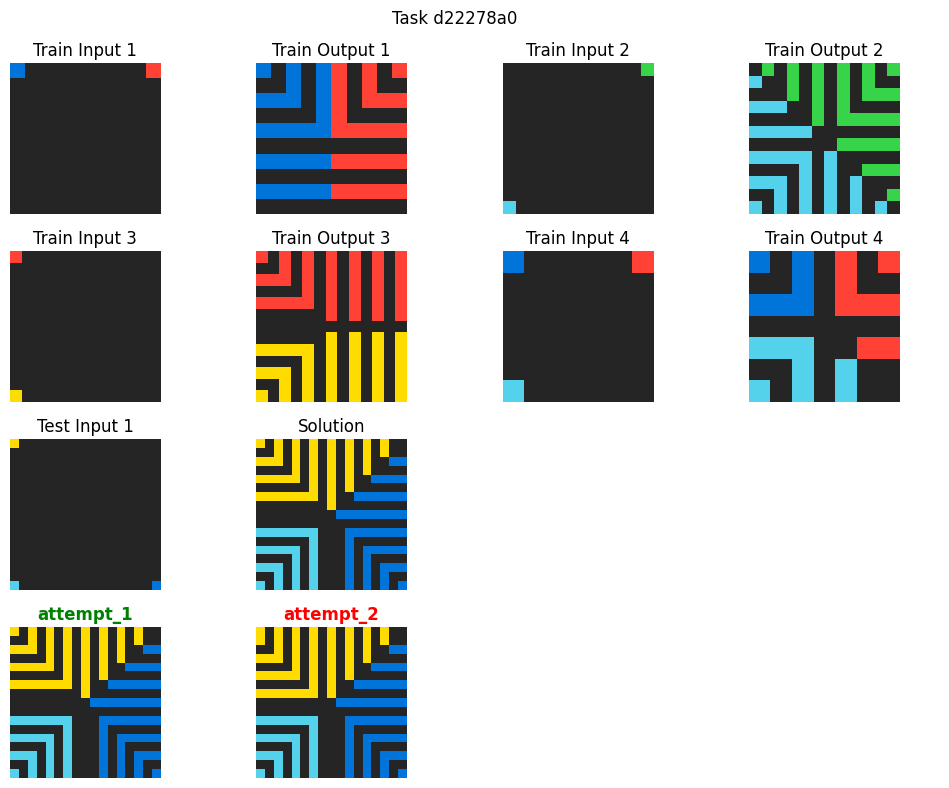

With TTT


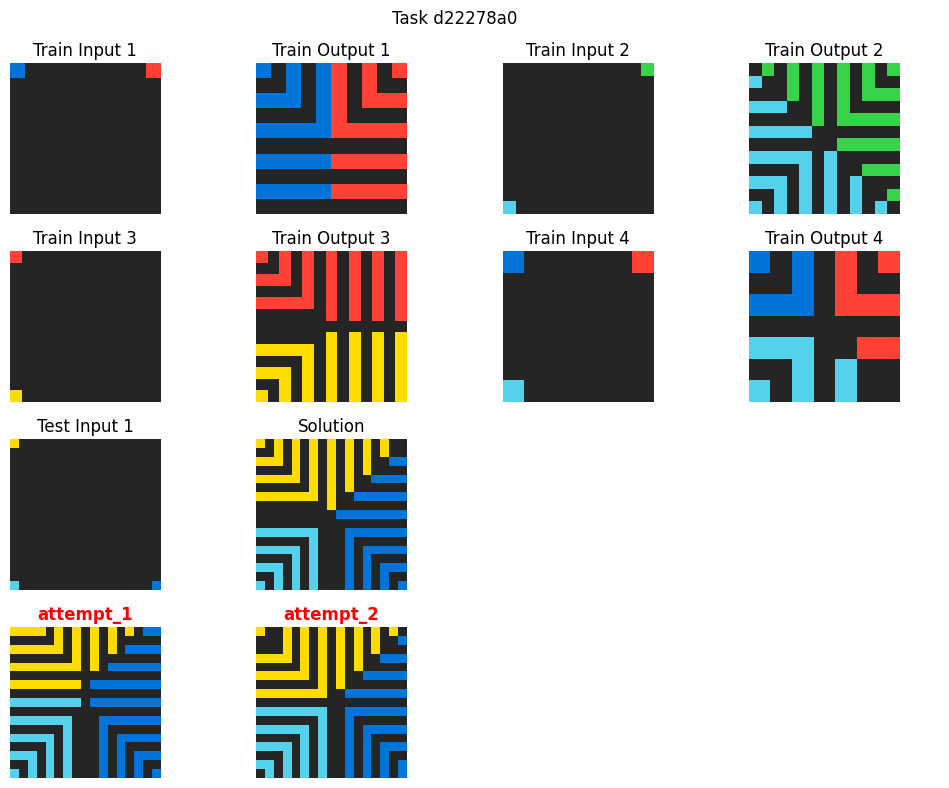

In [10]:
# Visualize the tasks solved without ttt but not with
from visualize_grids import plot_task_and_solution

for task_id in solved_without_ttt_not_with:
    print("W/O TTT")
    plot_task_and_solution(data_train[task_id], data_train_solutions[task_id], data_submission[task_id][0], task_id)
    print("With TTT")
    plot_task_and_solution(data_train[task_id], data_train_solutions[task_id], data_submission_ttt[task_id][0], task_id)

With TTT


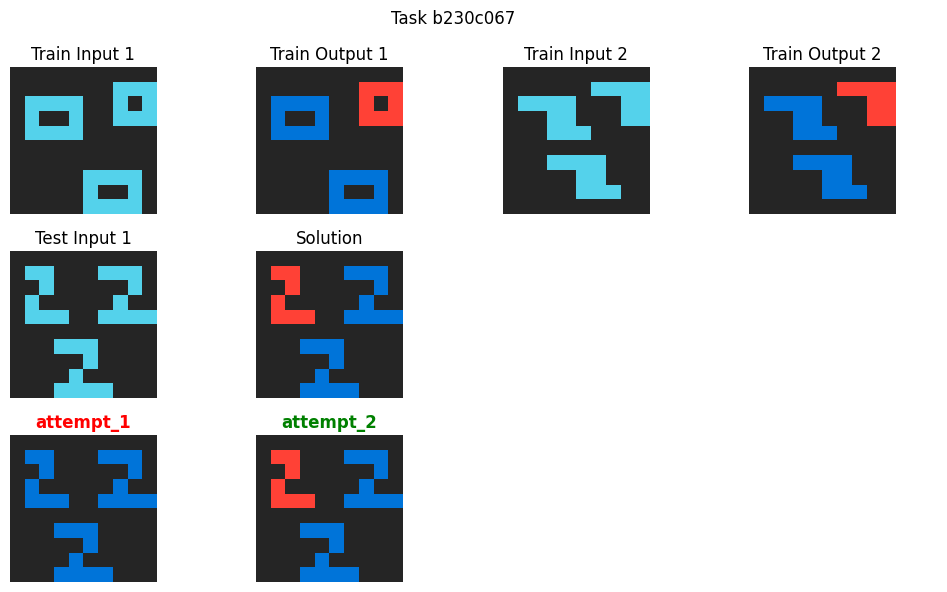

W/O TTT


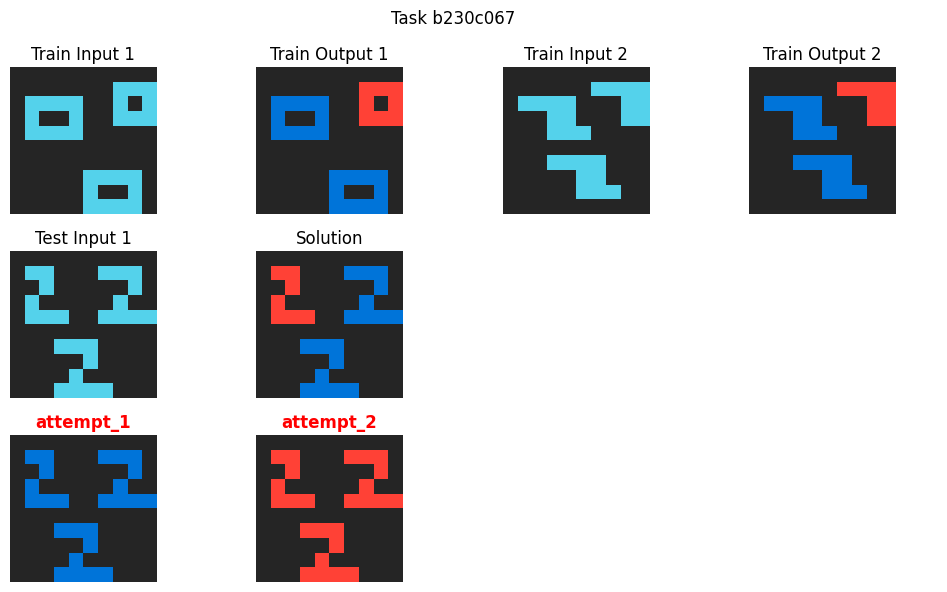

With TTT


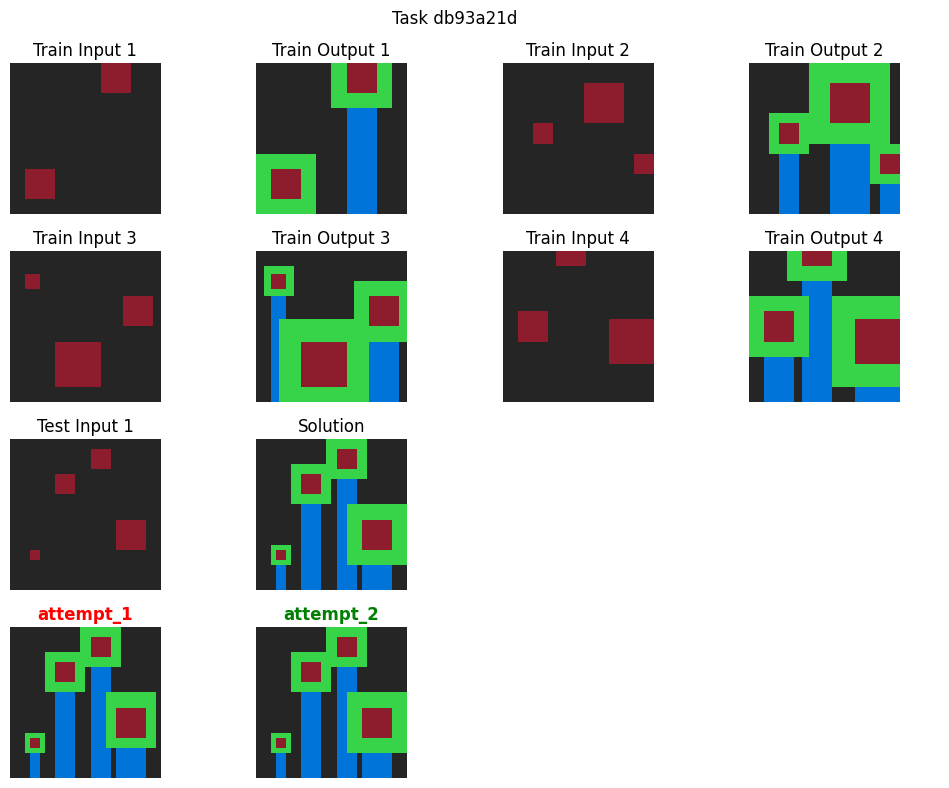

W/O TTT


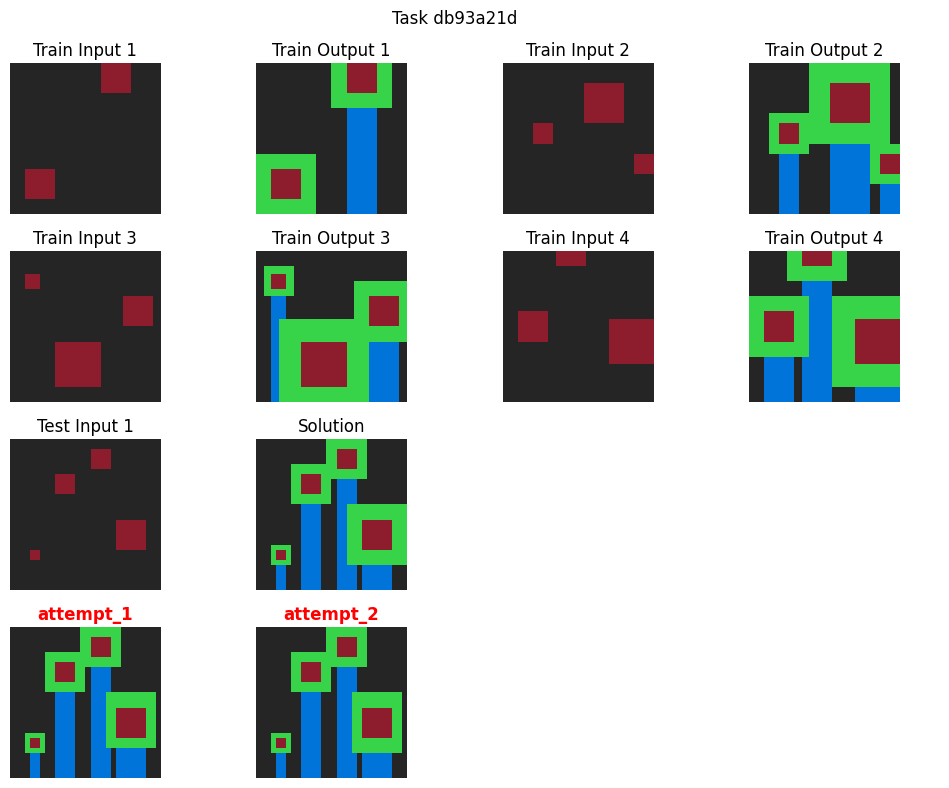

In [11]:
from visualize_grids import plot_task_and_solution
# Visualize the tasks solved with ttt but not without
# from visualize_grids import plot_task_and_solution

for i, task_id in enumerate(solved_with_ttt_not_without):
    # First (With TTT)
    print("With TTT")
    plot_task_and_solution(data_train[task_id], data_train_solutions[task_id], data_submission_ttt[task_id][0], task_id)
    # Second (Without TTT)
    print("W/O TTT")
    plot_task_and_solution(data_train[task_id], data_train_solutions[task_id], data_submission[task_id][0], task_id)
